# Project 9 Report:

## TEAM MEMBERS:
Matthew Richins & Supratik Chanda

## Introduction:

This project will look at various ways of using clustering to group unlabeled elements. This analysis will be beneficial to those who are new to clustering because the clustering methods and practises used in this simple example are applied from single to multi-dimensional problems. 

## Dataset:

The dataset given is a thermal image of USU Campus. This image has been created using satellite images and will be used for this project as our dataset. The file is an array of pixels that indicate the temperature at each location respectively. We will be use rasterio to open and use the data.
Each element in the array signifies temperature readings. Most of the values in the numpy array are extremely small and insignificant. For Part 2, to plot the image, we had to either remove the extremely small values or find a suitable temperature range such as good minimum temperature and good maximum temperature. 
For finding out the good_min and good_max, we first found out the max value of every row of numpy array. This is accomplished by np.amax function. We also found out the minimum value of every row using np.amin function. 


No data munging was required to clean up the data for part 3. In regions where no data was taken, the image contained very low numbers that represented non-numbers.  These regions needed to be ignored in some cases to be able to analyze the dataset.

## Analysis Technique:

To analyze the dataset we will focus on three approaches to view the image: using rasterio, using a single dimension cluster algorithm, and using a three dimensional cluster.


### Rasterio (Part 1)

To analyze using rasterio we are able to filter out unwanted values to provide a better image. By reducing the spectrum size the image will become more clear and recognizable to the viewer. This is a valid approach to gather a good understanding of the datasets size and appearance. 

### Clustering in Single Dimension (Part 2)

  Clustering is a method of grouping parameters based on the values they possess. For this project we will using sklearn’s birch clustering algorithm. This will construct a birch tree structure that will group the data and fit it based on its temperature. Using this method will be a good way of grouping objects together based on temperature. These objects radiate different temperatures and so clustering them together in this fashion will present the data in a simplified rendering.

To perform this work there are various factors that need to be considered. We will document the time it takes to perform these clusters and other observations made while working on them. We will focus on the number of clusters a birch tree model has and the size of data used to fit and shape the tree.

### Clustering in Three Dimensions (Part 3)

Like the technique above  we will perform clustering using temperature. We will also add the x and y coordinates as parameters to cluster. In theory this should improve clustering because the clustering will take into account neighboring groups with similar temperatures and provide a better clustering that will group by objects location and temperature.

Adding dimensions will cause the birch algorithm to grow exponentially, we will need to find ways to scale down the data without losing valuable information. We will create a method that will reduces the resolution of the image and use it to fit and predict the clusters.

## Result

### Rasterio (Part 1)
To develop a good image using rasterio we found a good_min and good_max for the image. We first found out the max value of every row of numpy array. This is accomplished by np.amax function. We also found out the minimum value of every row using np.amin function. With these boundaries determined, we could use the rasterio’s plotting to render this image: 

<img src="Project9/Rasterio1.png" style="height:300px">

We found that if we reduce the spectrum of the image we can obtain a clearer image as seen below:

<img src="Project9/Rasterio2.png" style="height:300px">

We expected these results because this is a simple rendering of the data that is provided and is done commonly in imagery. 

### Clustering in Single Dimension

### Part 1:
For part 1, we first found out the  good_min and the good_max using the clamp_low method. 
We kept the extremely small values as bad_min, v_max as good_max/4 and v_min as good_min/4. 

### Part 2:
#### Exploratory Data Analysis:

We found out, that in maximum case,the values of the nd array have extremely small numbers like 3.58e-10.  When we tried to fit the birch with these small numbers, we got an error:"CFSubcluster' object has no attribute 'centroid_". 
To overcome this error, we replaced the small outliers with value =0. No we have all significant temperature values and  0. There is no NaN value present. This helped us to fit the birch.

#### Approach used to create batches of the image that we feed to Birch:
We first declared a function. The parameters that we gave in this function are the x and y co-ordinates of the chunk of the image.The chunk is basically a numpy array . Each element signifies the temperature value. Inside the function, we used a new numpy 2d array that extracted all the elements(temperature) of the chunk. This function returns the new numpy 2d array. We then reshape the new numpy array and fit the birch with this 2d array.

#### Parameters of the batch of the image that we feed to Birch: 
Cluster size=25, X coordinates taken from 2000,3000 and Y coordinates taken from 4000 to 6000. So basically the size of the batch matrix  is 1000,2000. 

When we predicted the image looked like this:

<img src='Project9/pic1.png'>




#### Approach used to predict the whole image with different cluster size:

We took first 200 rows of X axis and 7600 columns of Y axis. The birch algorithm predicted the labels for this array. We kept the labels in a result matrix or numpy array. Then we fed the birch the next 200 rows and 7600 columns to predict the labels. This gave us an array of size 200,7600. We used this process till X-coordinate 4600. We stacked all the labelled arrays vertically. Thus we  got a result matrix of size 4600,7600. This matrix is the matrix that has all the predicted labels for every X and Y coordinate.

#### Parameters of the first image:

Cluster size=25, X coordinates taken from 2000,3000 and Y coordinates taken from 4000 to 6000. So basically the size of the batch matrix  is 1000,2000. We used this batch  to predict the whole image. 
The execution time is:  97.87605953216553 sec

<img src='Project9/pic2.png'>

#### Parameters of the second image:

Cluster size=25, X coordinates taken from 2000,3000 and Y coordinates taken from 5000 to 6000. So basically the size of the batch matrix  is 1000,1000. We used this batch  to predict the whole image. 
The execution time is:  74.1306095123291 sec

We analysed that although the two images have the same cluster size, the range of the co-ordinates play a big role. The first image has (1000  * 1000) more elements or pixels. Henceforth the first image took more 60 sec to predict and show the rasterio image. Thus we can say that more batch size is directly proportional to the runtime. Moreover, more clarity is found when we train the birch algorithm with a smaller matrix.

<img src='Project9/pic3.png'>

#### Parameters of the third image:

Cluster size=15, X coordinates taken from 2000,3000 and Y coordinates taken from 5000 to 6000. So basically the size of the batch matrix  is 1000,1000. We used this batch  to predict the whole image. 
The execution time is:  72.33885335922241 sec

If we compare the second image with the third image, the cluster size of the third image is 15 while that of the second image is 25.The birch algorithm for cluster size 25 takes a longer time to predict the labels. Henceforth,the second image takes a little bit more time to run. Since the clusters are less , the third image clarity is a bit less than the second image. 

<img src='Project9/pic4.png'>

#### Parameters of the fourth image:

Cluster size=30, X coordinates taken from 2000,3000 and Y coordinates taken from 5000 to 6000. So basically the size of the batch matrix  is 1000,1000. We used this batch  to predict the whole image. 
The execution time is:  71.67735862731934 sec

In comparison to the third  and fourth image,n_clusters having a size of 25 has the least runtime and the nest cluster size. But n_cluster= 15  takes a bit more time than n_clusters =30. The pixel clarity is the best for cluster size =30. 

<img src='Project9/pic5.png'>

#### Parameters of the fifth image:

Cluster size=30, X coordinates taken from 1000,3000 and Y coordinates taken from 4000 to 6000. So basically the size of the batch matrix  is 2000,2000. We used this batch size to predict the whole image. 
The execution time is:  150.14787793159485 sec

So, when we see that the batch size is larger, the execution time is so high. So we came to a conclusion that batch size is directly proportional to runtime.

<img src='Project9/pic6.png'>

### Clustering in Three Dimensions

This process was much more challenging. With the increased dimensions the computation time increased dramatically. We reduced the resolution of the image to contain every 15th pixel in the image. To verify that our image did not lose its appearance and integrity,  we used Rasterio to verify that we had not decreased the resolution too much:

<img src="Project9/RasterioLR.png" style="height:300px">

We felt that reducing the image any more would cause the image to become too pixelated. 

With our image reduced we then used similar methods to the above mentioned techniques to fix and predict the campus data. We started small with our datasets to try various clusters and find a good fit size and clustering count.

<img src="Project9/75x25Birch3D.png" style="height:300px">

As seen in this image we have a problem with over fitting because the clusters are too high for the items within the image. And when we predict the resolution modified campus image we get the following image:

<img src="Project9/75x25Birch3DPrediction.png" style="height:300px">

This image teaches us that the x and y are dominating the clustering because the clusters are zoning  out large sections of the image with the focal point being the region used to fit the birch tree.

To remedy the situation we then tried to use a larger section of the original image and allow a thousand clusters to model the many buildings, trees, and sidewalks in the image. We received the following results:

<img src="Project9/275x130Birch3DPrediction.png" style="height:300px">

This again looks like abstract art and provides the following predicted cluster image:

<img src="Project9/275x130Birch3DPredicted.png" style="height:300px">

Similar to the issue above the x and y properties of the pixel is dominating the clustering of the image. This shows that the same approach used in the single dimension of cropping a small piece and training is not sufficient. 

To provide a better model our future work would be to reduce the number of clusters and select multiple sections of the image and use them to fit a birch tree model. This would eliminate the x & y dependency  we are seeing in the 3D case.


# Clustering large datasets with Birch

In [1]:
#import rasterio
import rasterio.windows
from rasterio.plot import show
from sklearn.cluster import KMeans, Birch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import random
import math

## Read the temperature tif file

Warning: the temperature data has values set very small to indicate that they are not actual values. You should give them some meaningful value when you display the image, and you should carefully consider what to do with them when you cluster. Discuss your approach in your writeup.

In [2]:
# You might need to run this twice before it actually shows the image.
# temp for "temperature" not "temporary"
temp = rasterio.open('20180901_usucampus_tir_celsius.tif')
print(f'number of bands: {temp.count}')
print(f'shape: {temp.shape}')
print(temp.bounds)
print('profile:')
display(temp.profile)

number of bands: 1
shape: (4627, 7736)
BoundingBox(left=432151.133538606, bottom=4621180.41751768, right=433192.012338606, top=4621802.98036768)
profile:


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 7736, 'height': 4627, 'count': 1, 'crs': CRS.from_dict(init='epsg:32612'), 'transform': Affine(0.13455000000000075, 0.0, 432151.133538606,
       0.0, -0.13455000000000075, 4621802.98036768), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}

## Look at some additional properties of the image

In [3]:
print('projection: {}'.format(temp.crs))
#print('Affine transform (how raster is scaled, rotated, skewed, and/or translated):\n{}'.format(temp.affine))
print('width x height: {}x{}'.format(temp.width, temp.height))
print('number of bands: {}'.format(temp.count))
print('bounds: {}'.format(temp.bounds))
print('driver (data format): {}'.format(temp.driver))
print('no data values for all channels: {}'.format(temp.nodatavals))
print('all metadata: {}'.format(temp.meta))
    

projection: EPSG:32612
width x height: 7736x4627
number of bands: 1
bounds: BoundingBox(left=432151.133538606, bottom=4621180.41751768, right=433192.012338606, top=4621802.98036768)
driver (data format): GTiff
no data values for all channels: (-3.4028234663852886e+38,)
all metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 7736, 'height': 4627, 'count': 1, 'crs': CRS.from_dict(init='epsg:32612'), 'transform': Affine(0.13455000000000075, 0.0, 432151.133538606,
       0.0, -0.13455000000000075, 4621802.98036768)}


## Read a band and display the image

Different bands of a satellite images are often stacked together in one raster dataset. In our case, we only have one band. In order to have a closer look at the values stored in the band, we will take advantage of the [GDAL Band API](http://gdal.org/python/osgeo.gdal.Band-class.html).

In [4]:
def clamp_low(band1):
    good_min=0
    good_max=0
    bad_min =0
    for each in band1:
        if good_max < np.amax(each):
            good_max = np.amax(each)
        bad_min = np.amin(each)
        for elem in each:
            if elem < good_min and elem!= bad_min:
                good_min = elem
    print('good_max: ',good_max,'good_min: ',good_min,'bad_min: ',bad_min)
    return band1,good_min,good_max

band type: <class 'numpy.ndarray'>
band shape: (4627, 7736)
band data type: float32
good_max:  60.77 good_min:  -60.03 bad_min:  -3.4028235e+38


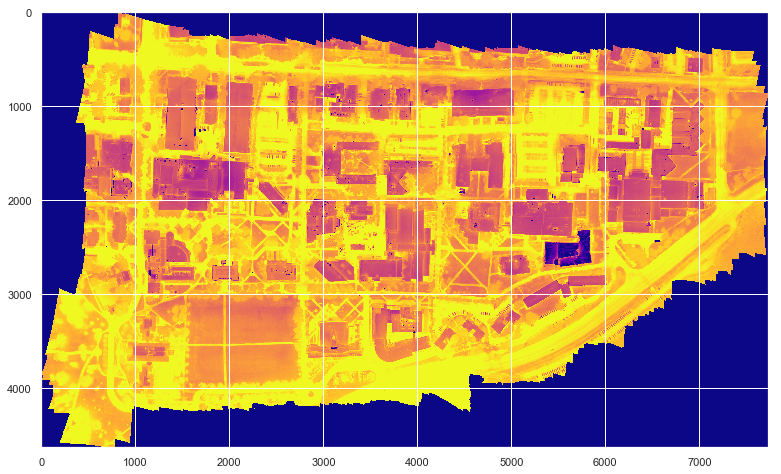

In [5]:
plt.figure(figsize=(25,8))
# Read the entire first (and only band) into a numpy array
band1 = temp.read(1)
print(f'band type: {type(band1)}')
print(f'band shape: {band1.shape}')
print(f'band data type: {band1.dtype}')

# TODO: Need to do something with the small values set to indicate nan. You might consider
# implementing a function called clamp_low.
band1, good_min, good_max = clamp_low(band1)
plt.imshow(band1, cmap='plasma', vmin=good_min/4, vmax=good_max/4)
plt.savefig('fig0.png')

## Part 2

### Analysis on a subset image

In [6]:
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import Birch
birch = Birch(n_clusters = 25)
def cropIt(band1,x0,x1,y0,y1):
    table = np.empty(shape=(x1-x0,y1-y0), dtype=float)
    for i in range(x0,x1):
        for j in range(y0,y1):
            table[i-x0][j-y0] = band1[i][j]
    return table

In [7]:
band1[band1 < -100] = 0

In [8]:
croppedBand= cropIt(band1,2000,3000,4000,6000)
X = croppedBand.reshape(-1,1)
birch.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=25,
   threshold=0.5)

## Plotting a subset of the image using the cropIt method

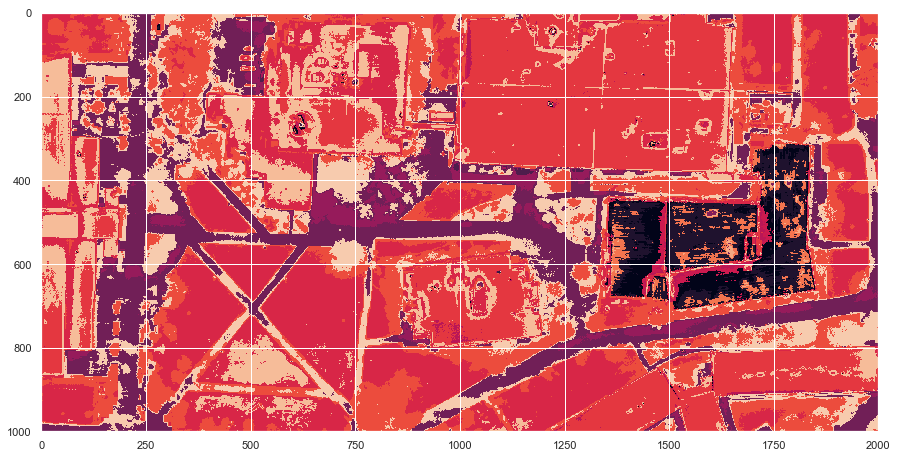

In [9]:
shape = croppedBand.shape
y = birch.predict(croppedBand.reshape(-1, 1))
y = y.reshape(shape)
plt.figure(figsize=(15,15))
imgplot = plt.imshow(y)
plt.savefig('Project9\\pic1.png')

### First Image: Cluster Size=25,X and Y Coordinates being: 2000,3000,4000,6000

In [10]:
import time
start_time= time.time()
from sklearn.cluster import Birch
birch = Birch(n_clusters = 25)
def cropIt(band1,x0,x1,y0,y1):
    table = np.empty(shape=(x1-x0,y1-y0), dtype=float)
    for i in range(x0,x1):
        for j in range(y0,y1):
            table[i-x0][j-y0] = band1[i][j]
    return table
croppedBand= cropIt(band1,2000,3000,4000,6000)
X = croppedBand.reshape(-1,1)
birch.fit(X)
def arrayFormation(index):
    overall= np.empty(shape=(200,0))
    for x in range(index,index+200,200):
        for y in range(0,7730,7730):
            croppedBand= cropIt(band1,x,x+200,y,y+7730)
            shape = croppedBand.shape
            y = birch.predict(croppedBand.reshape(-1, 1))
            y = y.reshape(shape)
            #print('x is: ',x)
            overall = np.hstack((overall,y))
    #print(overall.shape)
    return overall
        


In [11]:
finalArray= np.empty(shape=(0,7730))
for index in range(0,4600,200):
    k = arrayFormation(index)
    finalArray = np.vstack((finalArray,k))

The execution time is:  97.87605953216553 sec


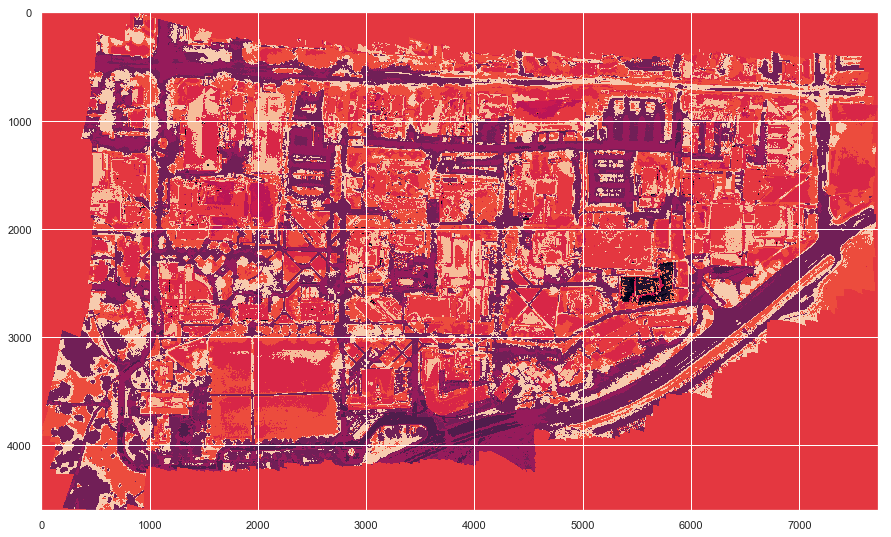

In [12]:
plt.figure(figsize=(15,15))
imgplot = plt.imshow(finalArray)
plt.savefig('Project9\pic2.png')
print('The execution time is: ',time.time()-start_time, 'sec')

## Second Image: Cluster size= 25 with X and Y Coordinates being: 2000,3000,5000,6000

The execution time is:  74.1306095123291 sec


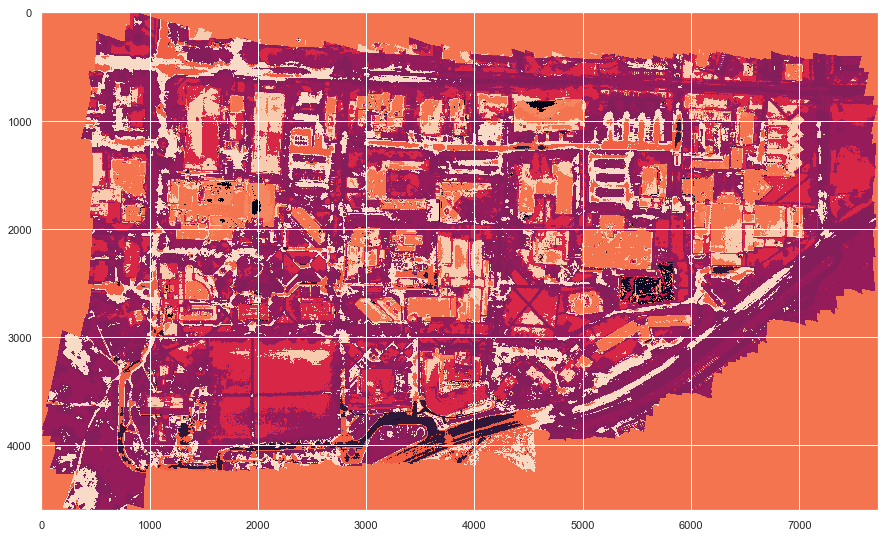

In [13]:
import time
start_time = time.time()
from sklearn.cluster import Birch
birch = Birch(n_clusters = 25)
croppedBand= cropIt(band1,2000,3000,5000,6000)
X = croppedBand.reshape(-1,1)
birch.fit(X)
def arrayFormation(index):
    overall= np.empty(shape=(200,0))
    for x in range(index,index+200,200):
        for y in range(0,7730,7730):
            croppedBand= cropIt(band1,x,x+200,y,y+7730)
            shape = croppedBand.shape
            y = birch.predict(croppedBand.reshape(-1, 1))
            y = y.reshape(shape)
            #print('x is: ',x)
            overall = np.hstack((overall,y))
    #print(overall.shape)
    return overall
finalArray= np.empty(shape=(0,7730))
for index in range(0,4600,200):
    k = arrayFormation(index)
    finalArray = np.vstack((finalArray,k))
plt.figure(figsize=(15,15))
imgplot = plt.imshow(finalArray)
plt.savefig('Project9\pic3.png')
print('The execution time is: ',time.time()-start_time, 'sec')

# 3rd Image Cluster size= 15 with X and Y Coordinates being: 

# 2000,3000,5000,6000

The execution time is:  72.33885335922241 sec


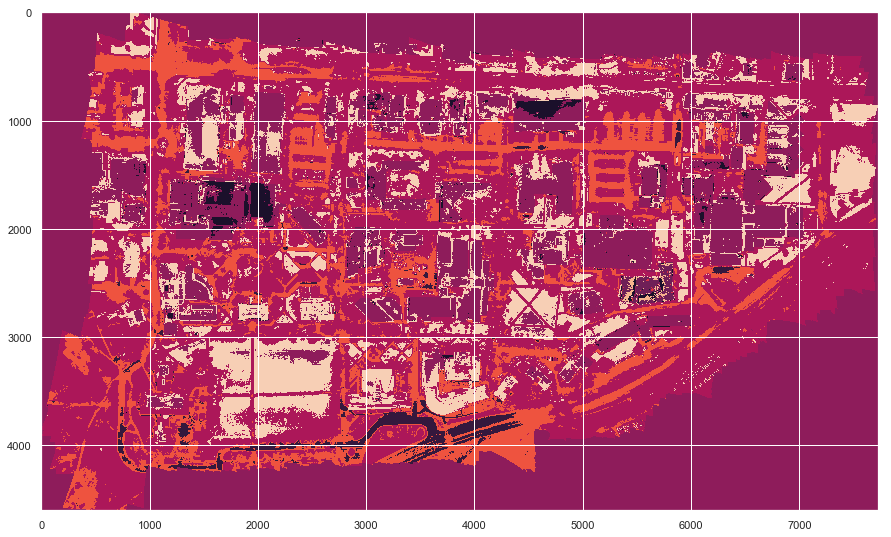

In [14]:
import time
birch= Birch(n_clusters = 15)
start_time = time.time()
croppedBand= cropIt(band1,2000,3000,5000,6000)
X = croppedBand.reshape(-1,1)
birch.fit(X)
def arrayFormation(index):
    overall= np.empty(shape=(200,0))
    for x in range(index,index+200,200):
        for y in range(0,7730,7730):
            croppedBand= cropIt(band1,x,x+200,y,y+7730)
            shape = croppedBand.shape
            y = birch.predict(croppedBand.reshape(-1, 1))
            y = y.reshape(shape)
            #print('x is: ',x)
            overall = np.hstack((overall,y))
    #print(overall.shape)
    return overall
finalArray= np.empty(shape=(0,7730))
for index in range(0,4600,200):
    k = arrayFormation(index)
    finalArray = np.vstack((finalArray,k))
plt.figure(figsize=(15,15))
imgplot = plt.imshow(finalArray)
plt.savefig('Project9\pic4.png')
print('The execution time is: ',time.time()-start_time, 'sec')

## 4th Image:  No of clusters =30. X, y coordinates are 2000,3000 and 5000,6000

The execution time is:  71.67735862731934 sec


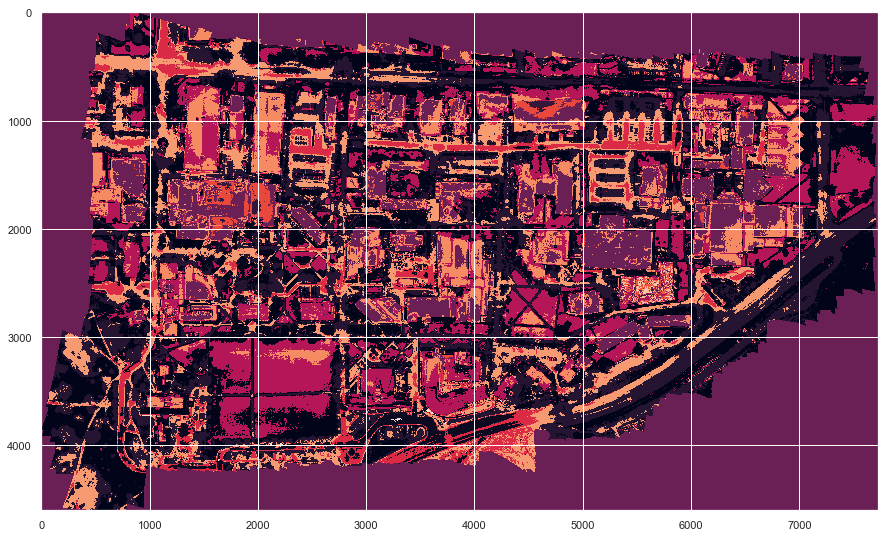

In [15]:
import time
birch= Birch(n_clusters = 30)
start_time = time.time()
croppedBand= cropIt(band1,2000,3000,5000,6000)
X = croppedBand.reshape(-1,1)
birch.fit(X)
def arrayFormation(index):
    overall= np.empty(shape=(200,0))
    for x in range(index,index+200,200):
        for y in range(0,7730,7730):
            croppedBand= cropIt(band1,x,x+200,y,y+7730)
            shape = croppedBand.shape
            y = birch.predict(croppedBand.reshape(-1, 1))
            y = y.reshape(shape)
            #print('x is: ',x)
            overall = np.hstack((overall,y))
    #print(overall.shape)
    return overall
finalArray= np.empty(shape=(0,7730))
for index in range(0,4600,200):
    k = arrayFormation(index)
    finalArray = np.vstack((finalArray,k))
plt.figure(figsize=(15,15))
imgplot = plt.imshow(finalArray)
plt.savefig('Project9\pic5.png')
print('The execution time is: ',time.time()-start_time, 'sec')

## 5th Image: No of clusters =30. X, y coordinates are 1000,3000 and 4000,6000. Bigger Batch size

The execution time is:  150.14787793159485 sec


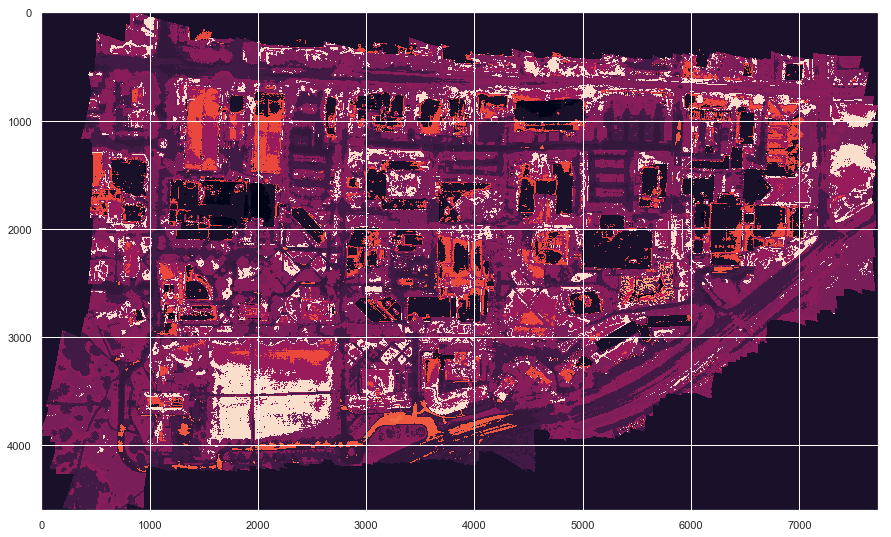

In [16]:
import time
birch= Birch(n_clusters = 30)
start_time = time.time()
croppedBand= cropIt(band1,1000,3000,4000,6000)
X = croppedBand.reshape(-1,1)
birch.fit(X)
def arrayFormation(index):
    overall= np.empty(shape=(200,0))
    for x in range(index,index+200,200):
        for y in range(0,7730,7730):
            croppedBand= cropIt(band1,x,x+200,y,y+7730)
            shape = croppedBand.shape
            y = birch.predict(croppedBand.reshape(-1, 1))
            y = y.reshape(shape)
            #print('x is: ',x)
            overall = np.hstack((overall,y))
    #print(overall.shape)
    return overall
finalArray= np.empty(shape=(0,7730))
for index in range(0,4600,200):
    k = arrayFormation(index)
    finalArray = np.vstack((finalArray,k))
plt.figure(figsize=(15,15))
imgplot = plt.imshow(finalArray)
plt.savefig('Project9\pic6.png')
print('The execution time is: ',time.time()-start_time, 'sec')

# Part Three

In [23]:
def DegradeResolution(band, spacing = 10, d = 3):
    if (d == 3):
        nBand = np.ndarray(shape=(int(band.shape[0]/spacing),int(band.shape[1]/spacing), 3))
    else:
        nBand = np.ndarray(shape=(int(band.shape[0]/spacing),int(band.shape[1]/spacing)))
    print("shape",nBand.shape, band.shape)
    Y = -1
    for y in range(0,band.shape[0]-spacing, spacing):
        Y += 1
        X = -1
        for x in range(0, band.shape[1]-spacing, spacing):
            X += 1
            if (d == 3):
                nBand[Y][X] = np.array([band[y][x], X, Y])
            else:
                nBand[Y][X] = band[y][x]
    return nBand
            
            
def CropIt3D(band, x0, y0, x1, y1):
    table = np.ndarray(shape=(y1-y0, x1-x0, 3))
    for x in range(x0, x1):
        for y in range(y0, y1):
            pixel = np.array([band[y][x], x, y])
            table[y-y0][x-x0] = pixel
    return table

def AddToBirch(birch, sample):
    X = sample.reshape(-1,3)
    birch.partial_fit(X)
    return birch





shape (308, 515) (4627, 7736)


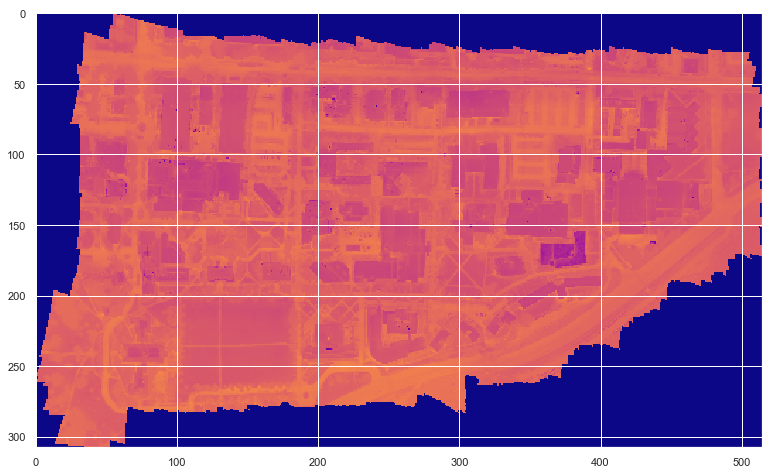

In [41]:
lrBand = DegradeResolution(band1, 15, 1)

plt.figure(figsize=(25,8))
plt.imshow(lrBand, cmap='plasma', vmin=good_min, vmax=good_max)
plt.imshow(lrBand, cmap='plasma', vmin=good_min, vmax=good_max)

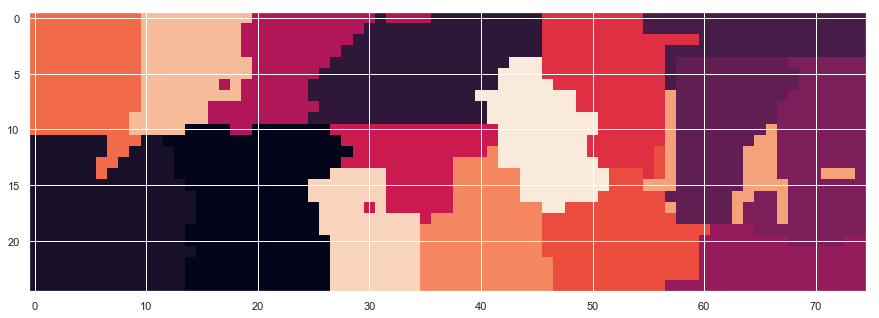

In [42]:
# Initialize Birch
birch = Birch(n_clusters = 17)


cropBand3D = CropIt3D(lrBand, 300, 160, 375, 185)
X = cropBand3D.reshape(-1,3)
brc = birch.partial_fit(X)
shape = cropBand3D.shape
y = birch.predict(cropBand3D.reshape(-1, 3))
y = y.reshape(shape[0:2])
plt.figure(figsize=(15,15))
imgplot = plt.imshow(y)


shape (308, 515, 3) (4627, 7736)


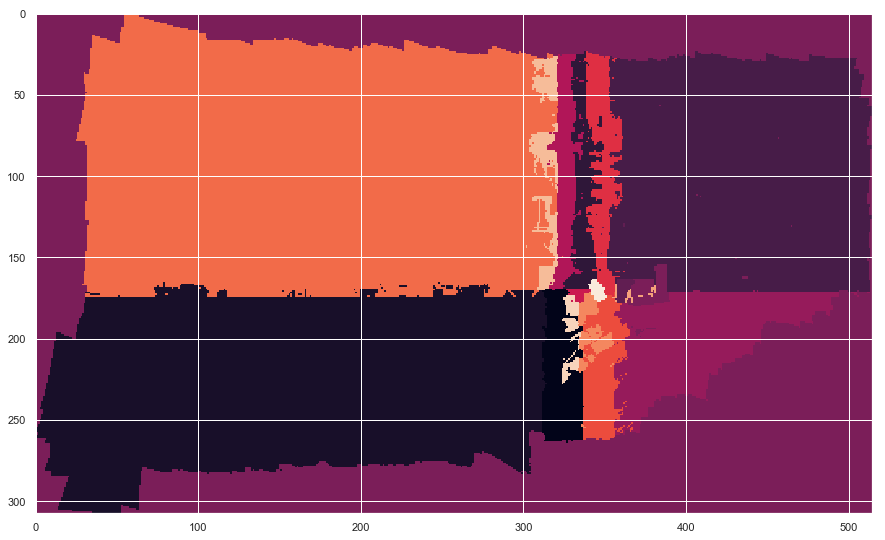

In [43]:
lrBand = DegradeResolution(band1, 15, 3)
shape = lrBand.shape
y = birch.predict(lrBand.reshape(-1, 3))
y = y.reshape(shape[0:2])
plt.figure(figsize=(15,15))
imgplot = plt.imshow(y)

shape (308, 515) (4627, 7736)


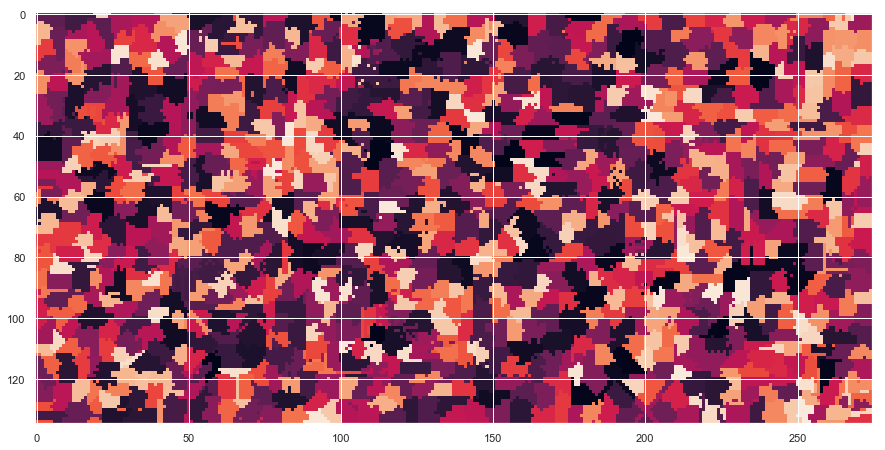

In [55]:
# Initialize Birch
birch = Birch(n_clusters = 1000)
lrBand = DegradeResolution(band1, 15, 1)

cropBand3D = CropIt3D(lrBand, 100, 50, 375, 185)
X = cropBand3D.reshape(-1,3)
brc = birch.partial_fit(X)
shape = cropBand3D.shape
y = birch.predict(cropBand3D.reshape(-1, 3))
y = y.reshape(shape[0:2])
plt.figure(figsize=(15,15))
imgplot = plt.imshow(y)

shape (231, 386, 3) (4627, 7736)


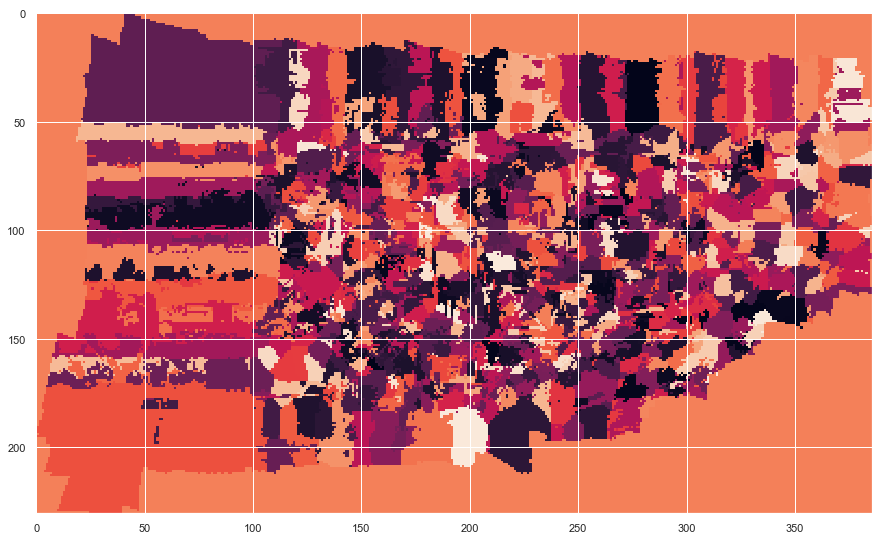

In [59]:
lrBand = DegradeResolution(band1, 20, 3)
shape = lrBand.shape
y = birch.predict(lrBand.reshape(-1, 3))
y = y.reshape(shape[0:2])
plt.figure(figsize=(15,15))
imgplot = plt.imshow(y)